In [3]:
# import dependencies
import pandas as pd
#from apiKey import api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [ ]:
# pull data from csv
file_one = "Resources/highest_grossing_movies.csv"
df = pd.read_csv(file_one)
df.head()

In [3]:
# create a list to loop through the top1000
titles = df['Title'].str[:-7].values.tolist()


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [5]:
# Interacting with the API
url = f'http://www.omdbapi.com/?apikey={api_key}&t='
# make a list to append json data
title = 'Star Wars: Episode VII - The Force Awakens'
rt_movies_ls = [] # we'll turn this into a data frame? 
imdb_movies_ls = []
director_ls = []
actor_ls = []
title_ls = []
year_ls = []
rated_ls = []
length_ls = []
movie_json = requests.get(url + title).json()
movie_json

# request limit is 1000 daily
# we need to cut list down to 100

{'Title': 'Star Wars: Episode VII - The Force Awakens',
 'Year': '2015',
 'Rated': 'PG-13',
 'Released': '18 Dec 2015',
 'Runtime': '138 min',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Director': 'J.J. Abrams',
 'Writer': 'Lawrence Kasdan, J.J. Abrams, Michael Arndt',
 'Actors': 'Daisy Ridley, John Boyega, Oscar Isaac',
 'Plot': 'As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.',
 'Language': 'English',
 'Country': 'United States',
 'Awards': 'Nominated for 5 Oscars. 64 wins & 139 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BOTAzODEzNDAzMl5BMl5BanBnXkFtZTgwMDU1MTgzNzE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '93%'},
  {'Source': 'Metacritic', 'Value': '80/100'}],
 'Metascore': '80',
 'imdbRating': '7.8',
 'imdbVotes': '936,253',
 'imdbID': 'tt2488496',


In [6]:
#
for title in titles[:500]:
    try:
        # access json data
        movie_json = requests.get(url + title).json()
        movie_ratings_rt = movie_json['Ratings'][1]['Value']
        movie_ratings_imdb = movie_json['imdbRating']
        movie_director = movie_json['Director']
        movie_actors = movie_json['Actors']
        movie_year = movie_json['Year']
        movie_rating = movie_json['Rated']
        movie_length = movie_json['Runtime']
        #append json to movie_ls list
        rt_movies_ls.append(movie_ratings_rt)
        imdb_movies_ls.append(movie_ratings_imdb)
        director_ls.append(movie_director)
        actor_ls.append(movie_actors)
        title_ls.append(title)
        year_ls.append(movie_year)
        rated_ls.append(movie_rating)
        length_ls.append(movie_length)
    except:
        pass
# convert movie list into data frame
movie_json

{'Title': 'Prometheus',
 'Year': '2012',
 'Rated': 'R',
 'Released': '08 Jun 2012',
 'Runtime': '124 min',
 'Genre': 'Adventure, Mystery, Sci-Fi',
 'Director': 'Ridley Scott',
 'Writer': "Jon Spaihts, Damon Lindelof, Dan O'Bannon",
 'Actors': 'Noomi Rapace, Logan Marshall-Green, Michael Fassbender',
 'Plot': 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Language': 'English, Gaelic',
 'Country': 'United Kingdom, United States',
 'Awards': 'Nominated for 1 Oscar. 6 wins & 47 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTY3NzIyNTA2NV5BMl5BanBnXkFtZTcwNzE2NjI4Nw@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '73%'},
  {'Source': 'Metacritic', 'Value': '64/100'}],
 'Metascore': '64',
 'imdbRating': '7.0',
 'imdbVotes': '615,121',
 'imdbID': 'tt1446714',
 'Type': 'movie',
 'DVD': '09 Oct 2012',
 '

In [12]:


#print(title_ls[0])
#print(actor_ls[0])
#print(director_ls[0])

#print(year_ls[0])
#print(rt_movies_ls[0])
#print(imdb_movies_ls[0])




Star Wars: Episode VII - The Force Awakens
Daisy Ridley, John Boyega, Oscar Isaac
J.J. Abrams
2015
93%
7.8


In [9]:
full_moviels_df = pd.DataFrame()
full_moviels_df['Title'] = title_ls
full_moviels_df['World Sales'] = df['World Sales (in $)']
full_moviels_df['Year Released'] = year_ls
full_moviels_df['Rotten Tomatoes Score'] = rt_movies_ls
full_moviels_df['IMDB Score'] = imdb_movies_ls
full_moviels_df['Director(s)'] = director_ls
full_moviels_df['Headlining Actor(s)'] = actor_ls
full_moviels_df['Studio'] = df['Distributor']
full_moviels_df['Runtime'] = length_ls
full_moviels_df['Rating'] = rated_ls
full_moviels_df['Genre'] = df['Genre']
full_moviels_df.head()   

,Title,World Sales,Year Released,Rotten Tomatoes Score,IMDB Score,Director(s),Headlining Actor(s),Studio,Runtime,Rating,Genre
0,Star Wars: Episode VII - The Force Awakens,2069521700,2015,93%,7.8,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac",Walt Disney Studios Motion Pictures,138 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,2797501328,2019,94%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo",Walt Disney Studios Motion Pictures,181 min,PG-13,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar,2847246203,2009,82%,7.9,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",Twentieth Century Fox,162 min,PG-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,Black Panther,1347597973,2018,96%,7.3,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Walt Disney Studios Motion Pictures,134 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
4,Avengers: Infinity War,2048359754,2018,85%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffalo",Walt Disney Studios Motion Pictures,149 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"


In [10]:
full_moviels_df.to_csv("Output/Movie_Data.csv")

In [38]:
# convert movie list into data frame
#movie_list_df = pd.DataFrame(movies_ls)
#movie_list_df["Metacritic Rating"] = movie_list_df[2]['Value']
#movie_list_df

,0
0,93%
1,94%
2,82%
3,96%
4,85%


In [18]:
# merge dataframes

In [ ]:
# Bar Graphs on directors  sales, actors  sales,  studio sales,
# Combine list of actors into 1 large list to run a count of how many times an actor appears across all movies on list

#MK

In [282]:
# pull data
file = "Output/Movie_Data.csv"
full_moviels_df = pd.read_csv(file)
#pull sales, year, and genre columns
genre_df = full_moviels_df[['World Sales', 'Year Released', 'Genre']]

In [283]:
# seperate genres into new columns

genre_df = pd.concat([genre_df, genre_df['Genre'].str.split(',', expand=True)], axis=1)
genre_df = genre_df.drop(columns = 'Genre')
#RM

In [284]:
# Pull data from 2009 to 2019
genre_df = genre_df.loc[genre_df['Year Released'] > 2008]
genre_df = genre_df.loc[genre_df['Year Released'] < 2020]

In [285]:
# label new columns

genres = {genre_df.columns[2]: 'Genre_1', 
          genre_df.columns[3]: 'Genre_2',
          genre_df.columns[4]: 'Genre_3',
          genre_df.columns[5]: 'Genre_4',
          genre_df.columns[6]: 'Genre_5',
          genre_df.columns[7]: 'Genre_6',
          genre_df.columns[8]: 'Genre_7',
          genre_df.columns[9]: 'Genre_8'
         }
genre_df = genre_df.rename(columns=genres)

In [286]:
# revmove special characters from genre cells

genre_df['Genre_1'] = genre_df['Genre_1'].str.replace('\W', '', regex=True)
genre_df['Genre_2'] = genre_df['Genre_2'].str.replace('\W', '', regex=True)
genre_df['Genre_3'] = genre_df['Genre_3'].str.replace('\W', '', regex=True)
genre_df['Genre_4'] = genre_df['Genre_4'].str.replace('\W', '', regex=True)
genre_df['Genre_5'] = genre_df['Genre_5'].str.replace('\W', '', regex=True)
genre_df['Genre_6'] = genre_df['Genre_6'].str.replace('\W', '', regex=True)
genre_df['Genre_7'] = genre_df['Genre_7'].str.replace('\W', '', regex=True)
genre_df['Genre_8'] = genre_df['Genre_8'].str.replace('\W', '', regex=True)

In [287]:
# find all genres and years
#diff_genres = pd.concat([genre_df['Genre_1'],
           #genre_df['Genre_2'],
           #genre_df['Genre_3'],
           #genre_df['Genre_4'],
           #genre_df['Genre_5'],
           #genre_df['Genre_6'],
           #genre_df['Genre_7'],
           #genre_df['Genre_8']]).unique()
#years = genre_df['Year Released'].unique()

In [288]:
# sum the sales by year and genre
genre_1 = genre_df.groupby(['Year Released', 'Genre_1']).agg({'World Sales': 'sum'})
genre_1 = genre_1.reset_index()
genre_1 = genre_1.rename(columns={'Genre_1':'Genre'})

genre_2 = genre_df.groupby(['Year Released', 'Genre_2']).agg({'World Sales': 'sum'})
genre_2 = genre_2.reset_index()
genre_2 = genre_2.rename(columns={'Genre_2':'Genre'})

genre_3 = genre_df.groupby(['Year Released', 'Genre_3']).agg({'World Sales': 'sum'})
genre_3 = genre_3.reset_index()
genre_3 = genre_3.rename(columns={'Genre_3':'Genre'})

genre_4 = genre_df.groupby(['Year Released', 'Genre_4']).agg({'World Sales': 'sum'})
genre_4 = genre_4.reset_index()
genre_4 = genre_4.rename(columns={'Genre_4':'Genre'})

genre_5 = genre_df.groupby(['Year Released', 'Genre_5']).agg({'World Sales': 'sum'})
genre_5 = genre_5.reset_index()
genre_5 = genre_5.rename(columns={'Genre_5':'Genre'})

genre_6 = genre_df.groupby(['Year Released', 'Genre_6']).agg({'World Sales': 'sum'})
genre_6 = genre_6.reset_index()
genre_6 = genre_6.rename(columns={'Genre_6':'Genre'})

genre_7 = genre_df.groupby(['Year Released', 'Genre_7']).agg({'World Sales': 'sum'})
genre_7 = genre_7.reset_index()
genre_7 = genre_7.rename(columns={'Genre_7':'Genre'})

genre_8 = genre_df.groupby(['Year Released', 'Genre_8']).agg({'World Sales': 'sum'})
genre_8 = genre_8.reset_index()
genre_8 = genre_8.rename(columns={'Genre_8':'Genre'})

# reset index in order to rename genre columns for merging all info
final_genre = pd.concat([genre_1,
                         genre_2,
                         genre_3,
                         genre_4,
                         genre_5,
                         genre_6,
                         genre_7,
                         genre_8]).groupby(['Year Released','Genre']).sum().reset_index()

In [289]:
# Identify the most popular genres
final_genre['Genre'].value_counts()

Action       11
SciFi        11
Animation    11
Comedy       11
Drama        11
Family       11
Fantasy      11
Thriller     11
Adventure    11
Crime        10
Musical       9
Mystery       9
Romance       9
Biography     7
Music         6
Horror        6
History       5
Sport         4
War           4
Western       3
Name: Genre, dtype: int64

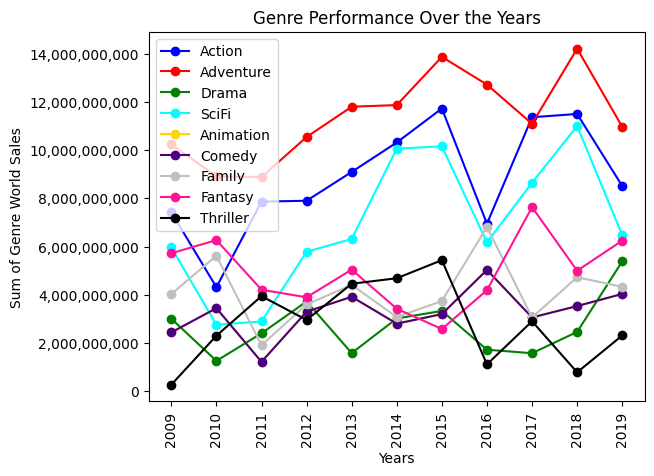

In [292]:
# Retrieve Action world sales
final_action = final_genre.loc[final_genre['Genre'] == 'Action']
action_y_values = final_action['World Sales']
x_values = final_action['Year Released']

# Adventure world sales
final_adventure = final_genre.loc[final_genre['Genre'] == 'Adventure']
adventure_y_values = final_adventure['World Sales']

#Drama world sales
final_drama = final_genre.loc[final_genre['Genre'] == 'Drama']
drama_y_values = final_drama['World Sales']

#SciFi world sales
final_scifi = final_genre.loc[final_genre['Genre'] == 'SciFi']
scifi_y_values = final_scifi['World Sales']

# Animation world sales
final_animation = final_genre.loc[final_genre['Genre'] == 'Animation']
animation_y_values = final_animation['World Sales']

# Comedy world sales
final_comedy = final_genre.loc[final_genre['Genre'] == 'Comedy']
comedy_y_values = final_comedy['World Sales']

# Family world sales
final_family = final_genre.loc[final_genre['Genre'] == 'Family']
family_y_values = final_family['World Sales']

# Fantasy world sales
final_fantasy = final_genre.loc[final_genre['Genre'] == 'Fantasy']
fantasy_y_values = final_fantasy['World Sales']

# Thriller world sales
final_thriller = final_genre.loc[final_genre['Genre'] == 'Thriller']
thriller_y_values = final_thriller['World Sales']


#plot lines
action_plot = plt.plot(x_values, action_y_values, marker ='o', color='blue', label="Action")
adventure_y_plot = plt.plot(x_values, adventure_y_values, marker ='o', color='red', label="Adventure")
drama_y_plot = plt.plot(x_values, drama_y_values, marker ='o', color='green', label="Drama")
scifi_yplot = plt.plot(x_values, scifi_y_values, marker ='o', color='cyan', label="SciFi")
animation_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='gold', label="Animation")
comedy_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='indigo', label="Comedy")
family_yplot = plt.plot(x_values, family_y_values, marker ='o', color='silver', label="Family")
fantasy_yplot = plt.plot(x_values, fantasy_y_values, marker ='o', color='deeppink', label="Fantasy")
thriller_yplot = plt.plot(x_values, thriller_y_values, marker ='o', color='black', label="Thriller")

plt.legend(loc="upper left") # plot legend
plt.ticklabel_format(style='plain')
# titles
plt.title("Genre Performance Over the Years")
plt.xlabel("Years")
plt.ylabel("Sum of Genre World Sales")
plt.xticks(x_values, rotation=90) # show all x values and rotate
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
plt.show()

In [21]:
# Bar chart for movie rated vs. box office

#EP

In [ ]:
# Pie chart of Genre Percentage in top grossing

#DV

In [ ]:
# Scatter plot for audience reception vs. sales
# Scatter plot for critic reception vs. sales

#ET